# 1. Statiscal learning: The setting and the estimator object

## 1.1 Datasets
2D arrays, .shape(n_samplpes, n_features)
#### 1.1.1 load_datasets

In [1]:
from sklearn import datasets
iris = datasets.load_iris()
data = iris.data
data.shape, iris.feature_names, iris.target_names

((150, 4),
 ['sepal length (cm)',
  'sepal width (cm)',
  'petal length (cm)',
  'petal width (cm)'],
 array(['setosa', 'versicolor', 'virginica'], dtype='|S10'))

In [2]:
digits = datasets.load_digits()
digits.images.shape

(1797, 8, 8)

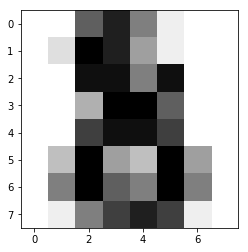

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.imshow(digits.images[-1], cmap=plt.cm.gray_r)

In [79]:
# to use this dataset with the scikit, we transform each 8*8 image into a feature vector of length 64
data = digits.images.reshape((digits.images.shape[0], -1))
data.shape, digits.images

((1797, 64), array([[[ 0.,  0.,  5., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ..., 15.,  5.,  0.],
         [ 0.,  3., 15., ..., 11.,  8.,  0.],
         ...,
         [ 0.,  4., 11., ..., 12.,  7.,  0.],
         [ 0.,  2., 14., ..., 12.,  0.,  0.],
         [ 0.,  0.,  6., ...,  0.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ...,  5.,  0.,  0.],
         [ 0.,  0.,  0., ...,  9.,  0.,  0.],
         [ 0.,  0.,  3., ...,  6.,  0.,  0.],
         ...,
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  1., ...,  6.,  0.,  0.],
         [ 0.,  0.,  0., ..., 10.,  0.,  0.]],
 
        [[ 0.,  0.,  0., ..., 12.,  0.,  0.],
         [ 0.,  0.,  3., ..., 14.,  0.,  0.],
         [ 0.,  0.,  8., ..., 16.,  0.,  0.],
         ...,
         [ 0.,  9., 16., ...,  0.,  0.,  0.],
         [ 0.,  3., 13., ..., 11.,  5.,  0.],
         [ 0.,  0.,  0., ..., 16.,  9.,  0.]],
 
        ...,
 
        [[ 0.,  0.,  1., ...,  1.,  0.,  0.],
         [ 0.,  0., 13., ...,  2.,  1.,  0.],
  

#### 1.1.2 dataset split: train dataset & test dataset

In [5]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.2, random_state=20 )

#### 1.1.3  Preprocessing
* **Normalizing data**   
    For many estimators, including the SVMs, having datasets with unit standard deviation for each feature is important to get good prediction.
    * based on the mean and std
    * Scaling features to a range

In [6]:
import sklearn.preprocessing as sk_preprocessing
# based on the mean and std
scaler = sk_preprocessing.StandardScaler().fit(iris.data)
new_x = scaler.transform(iris.data)
new_x[:5]

array([[-0.90068117,  1.03205722, -1.3412724 , -1.31297673],
       [-1.14301691, -0.1249576 , -1.3412724 , -1.31297673],
       [-1.38535265,  0.33784833, -1.39813811, -1.31297673],
       [-1.50652052,  0.10644536, -1.2844067 , -1.31297673],
       [-1.02184904,  1.26346019, -1.3412724 , -1.31297673]])

In [7]:
# normalization to a range
scaler = sk_preprocessing.MinMaxScaler(feature_range=(0, 1)).fit(iris.data)
new_x = scaler.transform(iris.data)
new_x[:4]

array([[0.22222222, 0.625     , 0.06779661, 0.04166667],
       [0.16666667, 0.41666667, 0.06779661, 0.04166667],
       [0.11111111, 0.5       , 0.05084746, 0.04166667],
       [0.08333333, 0.45833333, 0.08474576, 0.04166667]])

* **regularization**   
    Regulazation is set by the C parameter in models: a small value for C means more regularization; a large value for C means less regularization.

In [8]:
new_x = sk_preprocessing.normalize(iris.data, norm='l2')
new_x[:4]

array([[0.80377277, 0.55160877, 0.22064351, 0.0315205 ],
       [0.82813287, 0.50702013, 0.23660939, 0.03380134],
       [0.80533308, 0.54831188, 0.2227517 , 0.03426949],
       [0.80003025, 0.53915082, 0.26087943, 0.03478392]])

## 1.2 Estimator's objects
**Fitting data**: An estimator is any object that learns from data; it may be a classification, regression or clustering algorithm or a transformer that extracts/filters useful features from raw data.
```
>>>estimator.fit(data)

```

**Estimator parameters**: All the paramaters of an estimator can be set when it instantiated or by modifying the corresponding attribute:
```
>>>estimator = Estimator(param1=1, param2=2)
>>>eatimator.param1
```
**Estimated parameters**: All the estimated parameters are attributes of the estimator object ending an underscore
```
>>>estimator.estimated_param_
```


# 2. Supervised learning: Predicting an output variable from high-dimensional observations

* **the problem solved in supervised learning** :

    Supervised learning consists in learning the link between two datasets: the observed data x and an external variable y that we are trying to predict, usually called "target" or "labels". Most often, y is a 1D array of length n_samples.
    
    All supervised estimators in scikit-learning implements a fit(x,y) method to fit the model and a predict(x) method that, given unlabeled observations x, returns the predict labels y. 


* classification & regression

## 2.1 Nearest neighbor and the curse of dimensionality

* **Classifying irises**

In [9]:
import numpy as np
from sklearn import datasets
iris = datasets.load_iris()
iris_x = iris.data
iris_y = iris.target
np.unique(iris_y)

array([0, 1, 2])

#### 2.1.1 K-Nearest neighbors classifier  KNN

* **Training set and testing set**
While experimenting with any learning algotithm, it is important not to test the prediction of an estimator on the data used to fit the estimator as this would not be evaluating the performance of the estimator on new data. This is why datasets are often split into *train* and *test* data.
```
sklearn.model_test.train_test_split()
```

In [10]:
## Split iris data in train and test data
# A random permutation, to split the data randomly
np.random.seed(0)
indices = np.random.permutation(len(iris_x))
iris_x_train = iris_x[indices[:-10]]
iris_y_train = iris_y[indices[:-10]]
iris_x_test = iris_x[indices[-10:]]
iris_y_test = iris_y[indices[-10:]]

# Create and fit a nearest-neighbor classifier
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier()
knn.fit(iris_x_train, iris_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [11]:
knn.predict(iris_x_test), iris_y_test

(array([1, 2, 1, 0, 0, 0, 2, 1, 2, 0]), array([1, 1, 1, 0, 0, 0, 2, 1, 2, 0]))

In [12]:
knn.score(iris_x_test, iris_y_test)

0.9

#### 2.1.2 The curse of dimensionality
If the number of features is $p$, you now require $n\sim1/d^p$. As $p$ becomes large, the number of training points required for a good estimator grows exponentially. This is called the curse of dimensionality and is a core problem that machine learning addresses.

## 2.2 Linear model: from regression to sparsity

* **Diabetes dataset**

#### 2.2.1 Linear regression
LinearRegression fits a linear model to the data set by adjusting a set of parameters in order to make the sum of the squared residuals of the model as small as possible.

Linear model: $ y = X \beta + \varepsilon$
* X: data
* $y$: target variable
* $\beta$: Coeffcients
* $\varepsilon$: Observation noise

In [13]:
from sklearn import linear_model
diabetes = datasets.load_diabetes()
diabetes_x_train = diabetes.data[:-20]
diabetes_y_train = diabetes.target[:-20]
diabetes_x_test = diabetes.data[-20:]
diabetes_y_test = diabetes.target[-20:]

regr = linear_model.LinearRegression()
regr.fit(diabetes_x_train, diabetes_y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [14]:
regr.coef_

array([ 3.03499549e-01, -2.37639315e+02,  5.10530605e+02,  3.27736980e+02,
       -8.14131709e+02,  4.92814588e+02,  1.02848452e+02,  1.84606489e+02,
        7.43519617e+02,  7.60951722e+01])

In [15]:
# The mean square error
np.mean((regr.predict(diabetes_x_test)-diabetes_y_test)**2)

2004.5676026898211

In [16]:
# Explained variance score: 1 is perfect prediction
# and 0 means that there is no linear relationship between x and y. R^2  
regr.score(diabetes_x_test, diabetes_y_test)

0.5850753022690574

#### 2.2.2 Shrinkage
If there are few data points per dimension, noise in the observations induces high variance.

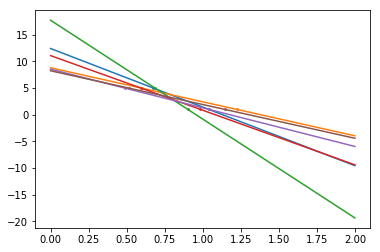

In [17]:
x = np.c_[.5, 1].T
y = [5, 1]
test = np.c_[0, 2].T
regr = linear_model.LinearRegression()

import matplotlib.pyplot as plt
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_x = .1*np.random.normal(size=(2, 1)) + x
    regr.fit(this_x, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_x, y, s=3)

A solution in high-dimensional statistical learning is to *shrink* the regression coefficients to zero: any two randomly chosen set of observations are likely to be uncorrelated. This is called **Ridge regression**

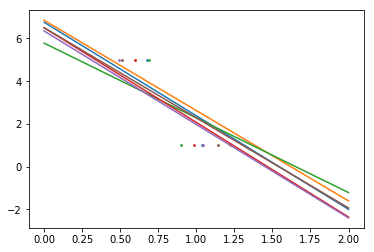

In [18]:
regr = linear_model.Ridge(alpha=.1)
plt.figure()

np.random.seed(0)
for _ in range(6):
    this_x = 0.1*np.random.normal(size=(2,1)) + x
    regr.fit(this_x, y)
    plt.plot(test, regr.predict(test))
    plt.scatter(this_x, y, s=3)    

**bias/variance tradeoff**: the larger the ridge alpha parameter, the higher the bias and the lower the variance

In [19]:
# choose alphs to minimize left out error
alphas = np.logspace(-4, -1, 6)
alphas

array([0.0001    , 0.00039811, 0.00158489, 0.00630957, 0.02511886,
       0.1       ])

In [20]:
from __future__ import print_function
print([regr.set_params(alpha=alpha).fit(diabetes_x_train, diabetes_y_train).score(diabetes_x_test, diabetes_y_test) for alpha in alphas])

[0.5851110683883531, 0.5852073015444677, 0.5854677540698492, 0.5855512036503916, 0.5830717085554161, 0.570589994372801]


**Note**: Capturing in the fitted parameters noise that prevents the model to generalize to new data is called overfitting. The bias introduced by the ridge regression is called a regulation.

#### 2.2.3 Sparsity
To improve the conditioning of the problem(i.e. mitigating the The curse of dimensionality), it would be interesting to select only the informative features and set non-informative ones. Ridge regression will decrease their contribution, but not set them to zero. Another penalization approach, called Lasso(least absolute shrinkage and selection operator), can set some coefficients to zero. Such methods are called **sparse method** and sparsity can be seen as an application of **Occam's razor**: prefer simpler models.

In [21]:
regr = linear_model.Lasso()
scores = [regr.set_params(alpha=alpha).fit(diabetes_x_train, diabetes_y_train).score(diabetes_x_test, diabetes_y_test) for alpha in alphas]
best_alpha = alphas[scores.index(max(scores))]
regr.alpha = best_alpha
regr.fit(diabetes_x_train, diabetes_y_train)
regr.coef_

array([   0.        , -212.43764548,  517.19478111,  313.77959962,
       -160.8303982 ,   -0.        , -187.19554705,   69.38229038,
        508.66011217,   71.84239008])

* Different  algorithm for the same problem
Different algorithm can be used to solve the same problem. For instance, the Lasso object in scikit-learn solves the lasso regression problem using a *coordinate descent* method, this is efficient on large dataset. However, the LassoLars object using the LARS algorithm is very efficient for problems in which the weight vector estimator is very sparse(i.e. problems with very few observations).

#### 2.2.4 Classification
For classification, as in the labeling iris task, linear regression is not the right approach as it will give too much weight to data far from the dicision frontier. A linear approach is to fit a *sigmoid* function or *Logistic* function:
$$ y = sigmoid(X\beta - offset) + \epsilon=\frac{1}{1 + exp(-X\beta + offset)} + \epsilon$$

<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_logistic_001.png"></img>

In [22]:
logistic = linear_model.LogisticRegression(C=1e5)
logistic.fit(iris_x_train, iris_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

* **Multiclass classification**

If you have several classes to predict, an option often used is to fit one-versus-all classifiers and them use a voting heuristic for the final desicion.
* **Shrinkage and sparsity with logistic regression**

The C parameter controls the amount of regularization in the LogisticRegression object: a large value for C results in less regularization. Penalty="l2" gives Shrinkage(i.e. non-sparse coefficients), while penalty="l1" gives Sparsity.





In [23]:
from sklearn import neighbors, linear_model
from sklearn.model_selection import train_test_split
digits_x = digits.data
digits_y = digits.target
digits_x_train, digits_x_test, digits_y_train, digits_y_test = train_test_split(digits_x, digits_y, test_size=0.1, random_state=20)

In [24]:
knn1 =neighbors.KNeighborsClassifier()
knn1.fit(digits_x_train, digits_y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=5, p=2,
           weights='uniform')

In [25]:
logstic1 = linear_model.LogisticRegression(C=1e5)
logstic1.fit(digits_x_train, digits_y_train)

LogisticRegression(C=100000.0, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='ovr', n_jobs=1, penalty='l2', random_state=None,
          solver='liblinear', tol=0.0001, verbose=0, warm_start=False)

In [26]:
knn1.score(digits_x_test, digits_y_test), logstic1.score(digits_x_test, digits_y_test)

(0.9888888888888889, 0.9555555555555556)

## 2.3  Support vector machines (SVMs)

#### 2.3.1 Linear SVMs
Support Vector Machine belong to the discriminant model family: they try to find a combination of samples to build a plane maximizing the margin between the two classes. Regularization is set by the C parameter: a small value for C means the margin is calculated using many or all of the observations around the separating line(more regularization); a large value for C means the margin is calculated on observations close to the separating line(less regularization).

|Unregularized SVM   |Regularized SVM (default)   |
|:------|:------|
|<img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_001.png"></img>| <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_margin_002.png"></img>|

SVM can be used in regression-SVR(Support Vector Regression), or in classification-SVC(Support Vector Classification).

In [27]:
def make_meshgrid(x, y, h=0.02):
    """Create a mesh of points to plot in 
    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional
    
    Returns:
    ----------
    xx, yy: ndarray
    
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

In [28]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.
    
    Parameters:
    -----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

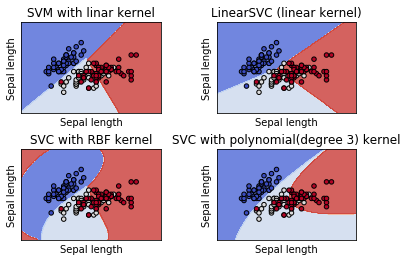

In [29]:
from sklearn import svm
X = iris.data[:, :2]
y = iris.target
C = 1.0
# We do not scale our data since we want to plot the support vectors
models = (svm.SVC(kernel='linear', C=C), svm.LinearSVC(C=C), svm.SVC(kernel='rbf', gamma=0.7, C=C), svm.SVC(kernel='poly', degree=3, C=C))
models = (clf.fit(X, y) for clf in models)

# title for the plots
titles = ('SVM with linar kernel', 'LinearSVC (linear kernel)', 'SVC with RBF kernel', 'SVC with polynomial(degree 3) kernel')
# Set-up 2*2 grid for plotting
fig, sub = plt.subplots(2,2)
plt.subplots_adjust(wspace=0.4, hspace=0.4)

X0, X1 = X[:, 0], X[:,1]
xx, yy = make_meshgrid(X0, X1)

for clf, title, ax in zip(models, titles, sub.flatten()):
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Sepal length')
    ax.set_ylabel('Sepal length')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    
plt.show()

#### 2.3.2 Using kernels
    Classes are not always linearly separable in feature space. The solution is to build a decision function that is not linear but may be polynomial instead.
    
| Linear kernel | Polynomial kernel | RBF kernel(Radial Basis Function) |
-|:-:|:-:|
| <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_001.png"></img> | <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_002.png"></img> | <img src="http://scikit-learn.org/stable/_images/sphx_glr_plot_svm_kernels_003.png"></img> |
|>>>svc = svm.SVC(kernel='linear')|>>>svc=svm.SVC(kernel='poly',degree=3)<br>>>>#degree:polynomial degree|>>>svc=svm.SVC(kernel='rbf')<br>>>>#gamma:inverse of size of radial kernel|


# 3. Model selection: choosing estimators and their parameters

## 3.1 Score, and cross-validated scores
Score--Bigger is better.

In [30]:
from sklearn import datasets, svm
import numpy as np
digits = datasets.load_digits()
X_digits = digits.data
y_digits = digits.target
svc = svm.SVC(C=1, kernel='linear')
svc.fit(X_digits[:-100],y_digits[:-100]).score(X_digits[-100:], y_digits[-100:])

0.98

In [31]:
x_folds = np.array_split(X_digits, 3)
y_folds = np.array_split(y_digits, 3)

In [32]:
x_folds[0].shape, X_digits.shape

((599, 64), (1797, 64))

In [33]:
scores = []
for k in range(3):
    X_train = list(x_folds)
    x_test = X_train.pop(k)
    x_train = np.concatenate(X_train)
    y_train = list(y_folds)
    y_test = y_train.pop(k)
    y_train = np.concatenate(y_train)
    scores.append(svc.fit(x_train, y_train).score(x_test, y_test))

In [34]:
scores

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

## 3.2 Cross-validation generators
A collection of classes can be used to generate lists of train/test indices for popular cross-validation strategies.   *KFold().split* method & *cross_val_score*

In [35]:
from sklearn.model_selection import KFold, cross_val_score
X = ['a', 'a', 'b', 'c', 'c', 'c']
k_fold = KFold(n_splits=3)
for train_indices, test_indices in k_fold.split(X):
    print("Train: %s | test: %s" %(train_indices, test_indices))

Train: [2 3 4 5] | test: [0 1]
Train: [0 1 4 5] | test: [2 3]
Train: [0 1 2 3] | test: [4 5]


In [36]:
[ svc.fit(digits_x[train], digits_y[train]).score(digits_x[test], digits_y[test]) for train,test in k_fold.split(digits_x)]

[0.9348914858096828, 0.9565943238731218, 0.9398998330550918]

In [37]:
cross_val_score(svc, digits_x, digits_y, cv=k_fold, n_jobs=1)

array([0.93489149, 0.95659432, 0.93989983])

In [38]:
# specify an alternative scoring method
cross_val_score(svc, digits_x, digits_y, cv=k_fold, scoring='precision_macro')

array([0.93969761, 0.95911415, 0.94041254])

#### Cross-validation generators
* **KFold(n_splits, shuffle, random_state)**: splits it into K folds, trains on K-1 and then tests on the left-out.
* **StratifiedKFold(n_splits, shuffle, random_state)**:  Same as K-Fold but preserves the class distribution within each fold.
* **GroupKFold(n_splits)**: Ensure that the same group is not in both testing and training sets.
* **ShuffleSplit(n_splits, test_size, train_size, random_state)**: Generates train/test indices based on random permutaion.
* **StratifiedShuffleSplit**: Same as shuffle split but preserves the class distribution within each iteration.
* **GroupShuffleSplit**: Ensures that the same group is not in both testing and training sets.
* **LeaveOneGroupOut()**: Takes a group array to group observations.
* **LeavePGroupOut(n_groups)**: Leave P groups out.
* **LeaveOneOut()**: Leave one observation out.
* **LeavePOut(P)**: Leave P observations out.
* **PredefinedSplit**: Generates train/test indices based on predefined splits.

In [39]:
# generates train/test indices based on random permutation
from sklearn.model_selection import ShuffleSplit
ss = ShuffleSplit(n_splits=3, test_size=0.5)
for train,test in ss.split(X):
    print(train,test)

[4 1 0] [5 2 3]
[5 2 0] [3 1 4]
[5 4 2] [1 3 0]


In [40]:
## exercise
svc = svm.SVC(kernel='linear')
C_s = np.logspace(-10, 0, 10)

scores = []
scores_std = []

for c in C_s:
    svc.C = c
    score = cross_val_score(svc, digits_x, digits_y, cv=ss, n_jobs=1)
    scores.append(np.mean(score))
    scores_std.append(np.std(score))
    
scores

[0.14979606970708195,
 0.08898776418242492,
 0.08935854653318502,
 0.12569521690767518,
 0.08935854653318502,
 0.9117538005190952,
 0.9729328883945124,
 0.982202447163515,
 0.9762699295513534,
 0.9777530589543938]

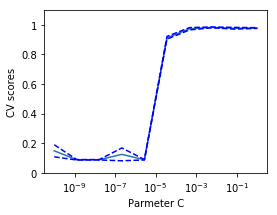

array([0. , 0.2, 0.4, 0.6, 0.8, 1. , 1.2])

In [41]:
plt.figure(1, figsize=(4, 3))
plt.clf()
plt.semilogx(C_s, scores)
plt.semilogx(C_s, np.array(scores) + np.array(scores_std), 'b--')
plt.semilogx(C_s, np.array(scores) - np.array(scores_std), 'b--')
locs, labels = plt.yticks()
plt.yticks(locs, list(map(lambda x: "%g" %x, locs)))
plt.ylabel("CV scores")
plt.xlabel("Parmeter C")
plt.ylim(0, 1.1)
plt.show()
locs

## 3.3 Grid-search and cross-validation estimators
### 3.3.1 Grid-search
scikit-learn provides an object that, given data, computes the score during the fit of an estimator on a parameter grid and chooses the parameters to maximize the cross-validation score. This object takes an estimator during hte construction and exposes an estimator API:

In [42]:
from sklearn.model_selection import GridSearchCV, cross_val_score
Cs = np.logspace(-6, -1, 10)
clf = GridSearchCV(estimator=svc, param_grid=dict(C=Cs), n_jobs=-1)
clf.fit(digits_x[:1000], digits_y[:1000])

GridSearchCV(cv=None, error_score='raise',
       estimator=SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False),
       fit_params=None, iid=True, n_jobs=-1,
       param_grid={'C': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [43]:
clf.best_score_

0.925

In [44]:
clf.best_estimator_.C

0.007742636826811277

In [45]:
clf.score(digits_x[1000:], digits_y[1000:])

0.9435382685069009

In [46]:
cross_val_score(clf, digits_x, digits_y)

array([0.93853821, 0.96327212, 0.94463087])

By default, the GridSearchCV uses a 3-fold cross-validation. However, if it detects that a classifier is passed, rather than a regressor, it uses a stratified 3-fold.
Two cross-validation loops are performed in parallel: one by the **GridSearchCV** estimator to set *gamma* and the other one by **cross_val_score** to measure the prediction performance of the estimator. The resulting scores are unbiased estimates of the prediction score on new data.

### 3.3.2 Cross-validated estimators
Cross-validation to set a parameter can be done more efficiently on an algorithm-by-algorithm basis. This is why, for certain estimators, scikit-learn exposes **Cross-validation: evaluating estimator performance** estimators that set their parameter automatically by cross-validation:

In [47]:
from sklearn import linear_model, datasets
lasso = linear_model.LassoCV()
diabetes = datasets.load_diabetes()
X_diabetes = diabetes.data
y_diabetes = diabetes.target
lasso.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True, cv=None, eps=0.001, fit_intercept=True,
    max_iter=1000, n_alphas=100, n_jobs=1, normalize=False, positive=False,
    precompute='auto', random_state=None, selection='cyclic', tol=0.0001,
    verbose=False)

In [48]:
lasso.alpha_

0.012291895087486173

In [49]:
from sklearn.linear_model import LassoCV, Lasso
from sklearn.model_selection import KFold, GridSearchCV
# 3-fold kfold split the dataset
k_fold = KFold(n_splits=3)
clf1 = LassoCV(cv=k_fold)
clf1.fit(X_diabetes, y_diabetes)

LassoCV(alphas=None, copy_X=True,
    cv=KFold(n_splits=3, random_state=None, shuffle=False), eps=0.001,
    fit_intercept=True, max_iter=1000, n_alphas=100, n_jobs=1,
    normalize=False, positive=False, precompute='auto', random_state=None,
    selection='cyclic', tol=0.0001, verbose=False)

In [50]:
clf1.score(X_diabetes[200:], y_diabetes[200:])

0.5253838702729516

In [51]:
cross_val_score(clf1, X_diabetes, y_diabetes)
clf1.cv

KFold(n_splits=3, random_state=None, shuffle=False)

In [52]:
lasso = Lasso()
alphas = np.logspace(-6,-1,10)
clf2 = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas),n_jobs=1)
clf2.fit(digits_x[:1000], digits_y[:1000])

/usr/local/lib/python2.7/dist-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


GridSearchCV(cv=None, error_score='raise',
       estimator=Lasso(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': array([1.00000e-06, 3.59381e-06, 1.29155e-05, 4.64159e-05, 1.66810e-04,
       5.99484e-04, 2.15443e-03, 7.74264e-03, 2.78256e-02, 1.00000e-01])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [53]:
clf2.cv_results_

/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('mean_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split0_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:122: FutureWarning: You are accessing a training score ('split1_train_score'), which will not be available by default any more in 0.21. If you need training scores, please set return_train_score=True
  warnings.warn(*warn_args, **warn_kwargs)
/usr/local/lib/python2.7/dist-packages/sklearn/utils/deprecation.py:1

{'mean_fit_time': array([0.06422091, 0.05444066, 0.02950692, 0.02371168, 0.02011673,
        0.0173374 , 0.02588153, 0.00909925, 0.00782641, 0.00619737]),
 'mean_score_time': array([0.00058707, 0.00042033, 0.00191903, 0.00264438, 0.00122364,
        0.00112836, 0.00282907, 0.00030375, 0.00032838, 0.00031296]),
 'mean_test_score': array([0.40967149, 0.41074159, 0.41079261, 0.41097499, 0.41161226,
        0.41366002, 0.41836411, 0.42448154, 0.42755996, 0.43525791]),
 'mean_train_score': array([0.68910038, 0.68910037, 0.68910029, 0.68909923, 0.68908596,
        0.68891731, 0.68741523, 0.68542497, 0.68269311, 0.673258  ]),
 'param_alpha': masked_array(data=[1e-06, 3.5938136638046257e-06, 1.2915496650148827e-05,
                    4.641588833612782e-05, 0.0001668100537200059,
                    0.0005994842503189409, 0.0021544346900318843,
                    0.007742636826811277, 0.02782559402207126, 0.1],
              mask=[False, False, False, False, False, False, False, False,
      

In [54]:
clf2.best_score_

0.4352579117914229

(0.0001, 0.31622776601683794)

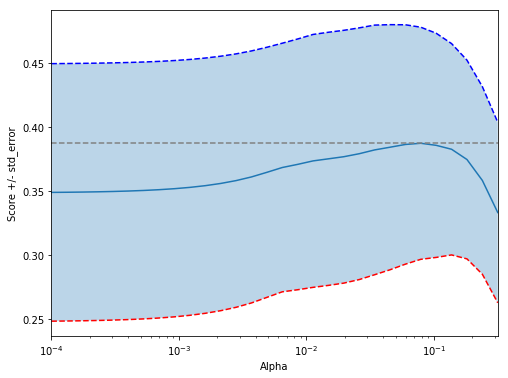

In [55]:
alphas = np.logspace(-4,-0.5,30)
lasso = Lasso(random_state=0)
n_folds = 3
clf1 = GridSearchCV(estimator=lasso, param_grid=dict(alpha=alphas), cv=n_folds, refit=False)
clf1.fit(X_diabetes[:150], y_diabetes[:150])
scores = clf1.cv_results_['mean_test_score']
scores_std = clf1.cv_results_['std_test_score']

plt.figure().set_size_inches(8,6)
plt.semilogx(alphas, scores)
std_error = scores_std/ np.sqrt(n_folds)
plt.semilogx(alphas, scores+std_error, 'b--')
plt.semilogx(alphas, scores-std_error, 'r--')
plt.fill_between(alphas, scores+std_error, scores-std_error, alpha=0.3)
plt.xlabel('Alpha')
plt.ylabel('Score +/- std_error')
plt.axhline(np.max(scores), linestyle='--', color='.5')
#plt.axvline(x=0.01, linestyle='--', color='0.5')
plt.xlim([alphas[0], alphas[-1]])


In [56]:
## LassoCV
lasso_cv = LassoCV(alphas=alphas, random_state=0)
k_fold = KFold(3)

for k,(train, test) in enumerate(k_fold.split(digits_x, digits_y)):
    lasso_cv.fit(digits_x[train], digits_y[train])
    print('Fold {0}, cv-score: {1:0.5f}, cv-alpha: {2:0.5f}'.format(k,lasso_cv.alpha_, lasso_cv.score(digits_x[test], digits_y[test])))

Fold 0, cv-score: 0.07880, cv-alpha: 0.51473
Fold 1, cv-score: 0.13738, cv-alpha: 0.56136
Fold 2, cv-score: 0.18139, cv-alpha: 0.44910


# 4. Unsupervised learning: seeking representations of the data
## 4.1 Clustering: grouping observations together

* ! **The problem solved in clustering**
Given the iris dataset, if we knew that there were 3 types of iris, but did not have access to a taxonomist to label them: we could try a **clustering task**: split the observations into well-separated group called *clusters*.

### 4.1.1 K-means clustering
the simplest clustering algorithm

In [57]:
from sklearn import cluster, datasets
from mpl_toolkits.mplot3d import Axes3D

iris = datasets.load_iris()
X_iris = iris.data
y_iris = iris.target


In [58]:
k_means = cluster.KMeans(n_clusters=3)
k_means.fit(X_iris)
print(k_means.labels_[::10])
labels = k_means.labels_

[0 0 0 0 0 2 2 2 2 2 1 1 1 1 1]


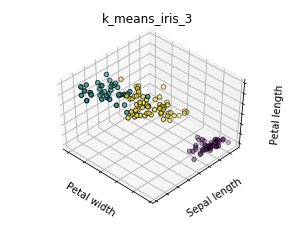

In [59]:
fig = plt.figure(figsize=(4,3))
ax = Axes3D(fig, rect=[0,0,0.95,1], elev=48, azim=134)
ax.scatter(X_iris[:,3], X_iris[:,0], X_iris[:,2], c=labels.astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Petal width')
ax.set_ylabel('Sepal length')
ax.set_zlabel('Petal length')
ax.set_title("k_means_iris_3")
ax.dist = 12

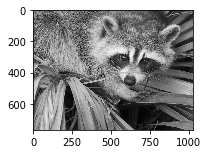

In [60]:
import scipy as sp
try:
    face = sp.face(gray=True)
except AttributeError:
    from scipy import misc
    face = misc.face(gray=True)

X = face.reshape((-1,1))    

k_means = cluster.KMeans(n_clusters=5, n_init=1)
k_means.fit(X)
values = k_means.cluster_centers_.squeeze()
labels = k_means.labels_
face_compressed = np.choose(labels, values)
face_compressed.shape = face.shape

vmin = face.min()
vmax = face.max()

plt.figure(1, figsize=(3, 2.2))
plt.imshow(face, cmap=plt.cm.gray, vmin=vmin, vmax=256)

### 4.1.2 Hierarchical agglomerative clustering: Ward
A **Hierarchical clustering** method is a type of cluster analysis that aims to build a hierarchy of clusters. In general, the various approaches of this technique are either:
* **Agglomerative**: --bottom-up approaches: each observation starts in its own cluster, and clusters are iteratively merged in such a way to minimize a linkage criterion. This approach is particularly interesting when the clusters of interest are mode of only a few observations. When the number of clusters is large, it is much more computationally efficient than k-means.
* **Divisive**: --top-down approaches: all observations start in one cluster, which is iteratively split as one moves down the hierarchy. For estimating large numbers of clusters, this approach is both slow (due to all observations starting as one cluster, which it splits recursively) and statistically ill-posed.

#### Connectivity-constrained clustering
With agglomerative clustering, it is possible to specify which samples can be clustered together by giving a connectivity graph. Graphs in the scikit are represented by their adjacency matrix. Often, a sparse matrix is used. This can be useful, for instrance, to retrieve connected regions (sometimes also referred to as connected components) when clustering an image:

In [61]:
import matplotlib.pyplot as plt

from sklearn.feature_extraction.image import grid_to_graph
from sklearn.cluster import AgglomerativeClustering

In [62]:
# Generate data
try:  # Scipy >= 0.16 have face in misc
    from scipy.misc import face
    face = face(gray=True)
except ImportError:
    face = sp.face(gray=True)
    
# Resize it to 10% of the original size to speed up the processing
face = sp.misc.imresize(face, 0.10) / 255
X = np.reshape(face, (-1, 1))

# Define the structure A of the data. Pixels connected to their neighbors
connectivity = grid_to_graph(*face.shape)


/usr/local/lib/python2.7/dist-packages/ipykernel_launcher.py:9: DeprecationWarning: `imresize` is deprecated!
`imresize` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``skimage.transform.resize`` instead.
  if __name__ == '__main__':


#### Feature agglomeration
We have seem that sparsity could be used to mitigate the curse of dimensionality, i.e. an insufficient amount of observations compared to the number of features. Another approach is to merge together similar features: **feature agglomeration**. This approach can be implemented by clustering in the feature direction, in other words clustering th transposed data.

In [63]:
images = digits.images
X = np.reshape(images, (len(images), -1))
connectivity = grid_to_graph(*images[0].shape)

agglo = cluster.FeatureAgglomeration(connectivity=connectivity, n_clusters=32)
agglo.fit(X)

FeatureAgglomeration(affinity='euclidean', compute_full_tree='auto',
           connectivity=<64x64 sparse matrix of type '<type 'numpy.int64'>'
	with 288 stored elements in COOrdinate format>,
           linkage='ward', memory=None, n_clusters=32,
           pooling_func=<function mean at 0x7fb0ec200500>)

In [64]:
X_reduced = agglo.transform(X)
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)
#images_approx

In [65]:
X_approx = agglo.inverse_transform(X_reduced)
images_approx = np.reshape(X_approx, images.shape)

#### transform and inverse_transform methods
some estimators expose a *transform* method, for instance to reduce the dimensionality of the dataset.
## 4.2 Decompositions: from a signal to componects and loadings
* **Componects and loadings**  
If X is our multivariate data, then the problem that we are trying to solve is to rewrite it on a different observational basis: we want to learn loadings L and a set of components C such that X = L C. Different criteria exist to choose the components.

### 4.2.1 Principal component analysis: PCA
Principal component analysis(PCA) selects the successive components that explain the maximum variance in the signal. The point cloud spanned by the observations above is very flat in one direction: one of the three univeriate features can almost be exactly computed using the other two. PCA finds the directions in which the data is not *flat*.

When used to *transform* data, PCA can reduce the dimensionality of the data by projecting on a principal subspace.

In [66]:
# Create a signal with only a useful dimensions
x1 = np.random.normal(size=100)
x2 = np.random.normal(size=100)
x3 = x1 + x2
X = np.c_[x1, x2, x3]

from sklearn import decomposition
pca = decomposition.PCA()
pca.fit(X)
pca.explained_variance_

array([3.04289374e+00, 1.16368691e+00, 1.86987452e-32])

In [67]:
# As we can see, only the 2 first componects are useful
pca.n_components = 2
X_reduced = pca.fit_transform(X)
X_reduced.shape

(100, 2)

### 4.2.2 Independent Component Analysis: ICA
Independent component analysis(ICA) selects components so that the distribution of their loadings carries a maximum amount of independent information. It is able to recover **non-Gaussian** independent signals:

In [68]:
# Generate sample data
from scipy import signal
time = np.linspace(0, 10, 2000)
s1 = np.sin(2 * time)
np.random.seed(0)
n_samples = 2000
time = np.linspace(0, 8, n_samples)

In [69]:
s1 = np.sin(2*time)
s2 = np.sign(np.sin(3*time))
s3 = signal.sawtooth(2*np.pi*time) # Signal 3: saw tooth signal
S = np.c_[s1, s2, s3]
S += 0.2 * np.random.normal(size=S.shape) # Add noise
S /= S.std(axis=0) # Standardize data
# Mix data
A = np.array([[1, 1, 1], [0.5, 2, 1],[1.5, 1, 2]])  # Mixing matrix
X = np.dot(S, A.T)  # Generate observations

# Compute ICA
ica = decomposition.FastICA(n_components=3)
S_ = ica.fit_transform(X)  # Reconstruct signals
A_ = ica.mixing_           # get estimated mixing matrix

# We can prove that the ICA model applies by reverting the unmixing
np.allclose(X, np.dot(S_, A_.T) + ica.mean_)

# For comparison, compute PCA
pca = decomposition.PCA(n_components=3)
H = pca.fit_transform(X)  # Reconstruct signals based on orthogonal components

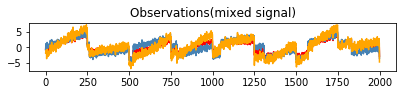

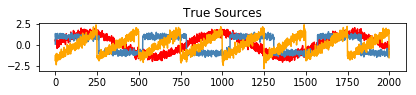

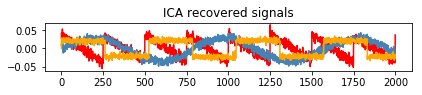

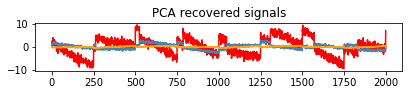

In [70]:
# plot results
plt.figure()
models = [X, S, S_, H]
names = ['Observations(mixed signal)', 'True Sources', 'ICA recovered signals', 'PCA recovered signals']
colors = ['red', 'steelblue', 'orange']

for ii, (model, name) in enumerate(zip(models, names), 1):
    plt.subplot(4,1,ii)
    plt.title(name)
    for sig, color in zip(model.T, colors):
        plt.plot(sig, color=color)
    
    plt.subplots_adjust(0.09, 0.04, 0.94, 0.94, 0.26, 0.46)
    plt.show()

# 5 Putting it all together
## 5.1 Pipelining
We have seen that some estimators can transform data and that some estimators can predict variables. We can also create combined estimators:

In [71]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model, decomposition, datasets
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

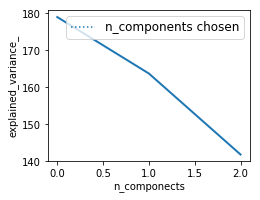

In [72]:
logistic = linear_model.LogisticRegression()
pipe = Pipeline(steps=[('pca', pca), ('logistic', logistic)])

X_digits = digits.data
Y_digits = digits.target

# plot the PCA spectrum
pca.fit(X_digits)

plt.figure(1, figsize=(4, 3))
plt.clf()
plt.axes([0.2, 0.2, 0.7, 0.7])
plt.plot(pca.explained_variance_, linewidth=2)
plt.axis('tight')
plt.xlabel('n_componects')
plt.ylabel('explained_variance_')

# Prediction
n_components = [20, 40, 64]
Cs = np.logspace(-4, 4, 3)

# parameters of pipelines can be set using '__' separated parameter names:
estimator = GridSearchCV(pipe, dict(pca__n_components=n_components, logistic__C=Cs))
estimator.fit(X_digits, y_digits)
plt.axvline(estimator.best_estimator_.named_steps['pca'].n_components, linestyle=':', label='n_components chosen')
plt.legend(prop=dict(size=12))
plt.show()

## 5.2 Face recognition with eigenfaces
The dataset used in this example is a preprocessed except of the 'Labeled Faces in the Wild', also known as LFW:

In [73]:
"""
=======================================
Faces recognition example using eigenfaces and SVMs
=======================================
"""
from __future__ import print_function
from time import time
import logging
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.datasets import fetch_lfw_people
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.svm import SVC

print(__doc__)


Faces recognition example using eigenfaces and SVMs



In [74]:
# Display progress logs on stdout
logging.basicConfig(level=logging.INFO, format='%(asctime)s %(message)s')

## Download the data, if not already on disk and load it as numpy arrays
lfw_people = fetch_lfw_people(min_faces_per_person=70, resize=0.4)

# introspect the images arrays to find the shapes (for plotting)
n_samples, h, w = lfw_people.images.shape

# for machinee learning we use the 2 data directly(as relative pixel positions info is ignored by this model)
X = lfw_people.data
n_features = X.shape[1]

# the label to predict is the id of the person
y = lfw_people.target
target_names = lfw_people.target_names
n_classes = target_names.shape[0]

print('Total dataset size:')
print('n_samples: %d' % n_samples)
print('n_features: %d' % n_features)
print('n_classes: %d' % n_classes)

Total dataset size:
n_samples: 760
n_features: 1850
n_classes: 3


In [75]:
# Split into a training set and a test set using a stratified k fold
# split into a training and testing set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Compute a PCA(eigenfaces) on the face dataset(treated as unlabeled dataset):
# unsupervised feature extraction / dimensionality reduction
n_components = 150
print('Extracing the top %d eigenfaces from %d faces' %(n_components, X_train.shape[0]))
t0 = time()
pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)
print('Done in %0.3fs' %(time()-t0))

eigenfaces = pca.components_.reshape((n_components, h, w))

print('Projecting the input data on the eigenfaces orthonormal basis')
t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print('Done in %0.3f' %(time()-t0))

Extracing the top 150 eigenfaces from 570 faces
Done in 0.916s
Projecting the input data on the eigenfaces orthonormal basis
Done in 0.046


In [76]:
## Train a SVM classification model
print('Fitting the classifier to the training set')
t0 = time()
param_grid = {'C': [1e3, 5e3, 1e4, 5e4, 1e5], 'gamma':[0.0001, 0.0005, 0.001, 0.005, 0.01, 0.1]}
clf = GridSearchCV(SVC(kernel='rbf', class_weight='balanced'), param_grid)
clf = clf.fit(X_train_pca, y_train)
print('Done in %0.3fs' %(time()-t0))
print('Best estimator found by grid search:')
print(clf.best_estimator_)

# Quantitative evaluation of the model quality on the test set
print("Predicting people's names on the test set")
t0 = time()
y_pred = clf.predict(X_test_pca)
print('Done in %0.3fs' %(time()-t0))
print(classification_report(y_test, y_pred, target_names=target_names))
print(confusion_matrix(y_test, y_pred, labels=range(n_classes)))


Fitting the classifier to the training set
Done in 7.889s
Best estimator found by grid search:
SVC(C=1000.0, cache_size=200, class_weight='balanced', coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma=0.001, kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
Predicting people's names on the test set
Done in 0.015s
                   precision    recall  f1-score   support

  Donald Rumsfeld       0.86      0.89      0.88        36
    George W Bush       0.92      0.98      0.95       123
Gerhard Schroeder       1.00      0.74      0.85        31

      avg / total       0.92      0.92      0.92       190

[[ 32   4   0]
 [  3 120   0]
 [  2   6  23]]


In [77]:
# Qualitative evaluation of the prediction using matplotlib
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    """Helper function to plot a gallery of portraits"""
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=0.01, right=0.99, top=0.99, hspace=0.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i+1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
# plot the result of the prediction on a portion of the best set
def title(y_pred, y_test, target_names, i):
    pred_name = target_names[y_pred[i]].rsplit(' ', 1)[-1]
    true_name = target_names[y_test[i]].rsplit(' ', 1)[-1]
    return 'Predicted: %s \nTrue:   %s' %(pred_name, true_name)


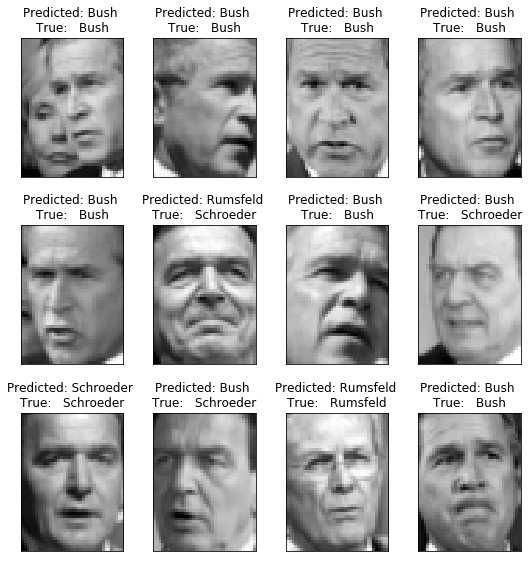

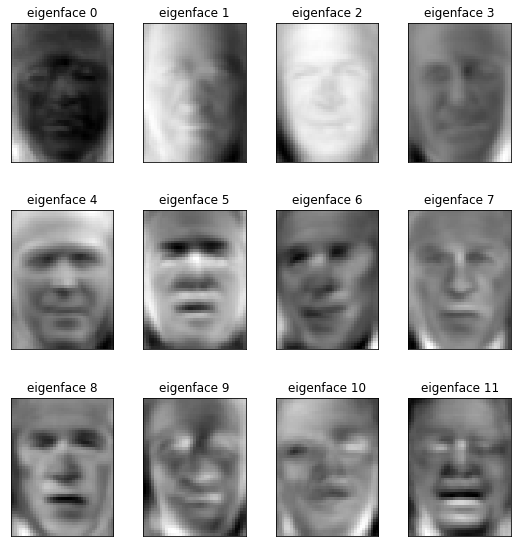

In [78]:
prediction_titles = [title(y_pred, y_test, target_names, i) for i in range(y_pred.shape[0]) ]
plot_gallery(X_test, prediction_titles, h, w)

# plot the gallery of the most significative eigenfaces
eigenface_titles = ['eigenface %d' % i for i in range(eigenfaces.shape[0])]
plot_gallery(eigenfaces, eigenface_titles, h, w)
plt.show()